# **Réseaux de Neurones**

Documentation Sci-kit Learn sur le Multi-layer Perceptron : https://scikit-learn.org/stable/modules/neural_networks_supervised.html

# Perceptron Multi-Couches (MLP)

Le **Perceptron Multi-Couches (MLP)** est un algorithme d'apprentissage supervisé qui apprend une fonction $f: R^m \rightarrow R^o$ en s'entraînant sur un jeu de données, où $m$ est le nombre de dimensions en entrée et $o$ est le nombre de dimensions en sortie. 

Étant donné un ensemble de caractéristiques $X = \{x_1, x_2, ..., x_m\}$ et une cible $y$, il peut apprendre un approximateur de fonction non linéaire pour la classification ou la régression. Il se distingue de la régression logistique par la présence, entre la couche d'entrée et la couche de sortie, d'une ou plusieurs couches non linéaires appelées **couches cachées**. 

L'image suivante illustre un MLP avec une couche cachée et une sortie scalaire.

![Multi-Layer Perceptron](https://scikit-learn.org/stable/_images/multilayerperceptron_network.png)

La couche la plus à gauche, appelée **couche d'entrée**, est constituée d'un ensemble de neurones $\{x_i | x_1, x_2, ..., x_m\}$ représentant les caractéristiques en entrée. 

Chaque neurone dans la couche cachée transforme les valeurs de la couche précédente par une sommation linéaire pondérée :

$$ w_1x_1 + w_2x_2 + ... + w_mx_m $$

suivie d'une fonction d'activation non linéaire $g(\cdot): R \rightarrow R$, comme la fonction tangente hyperbolique. 

Enfin, la **couche de sortie** reçoit les valeurs de la dernière couche cachée et les transforme en valeurs de sortie.



# Importer les librairies

# Importer le jeu de données

In [1]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt  # visualisation des données
import pandas as pd  # traitement des données (ex: lecture de fichiers CSV)
import seaborn as sns  # visualisation des données

In [2]:
# importer le jeu de données digits
digits = load_digits(as_frame=True)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# Jeu de données vers DataFrame Pandas

In [3]:
# Put into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['target'] = digits.target

In [4]:
# Les 10 premières valeurs du jeu de données
print(df_digits.head(10))

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   
5        0.0        0.0       12.0       10.0        0.0        0.0   
6        0.0        0.0        0.0       12.0       13.0        0.0   
7        0.0        0.0        7.0        8.0       13.0       16.0   
8        0.0        0.0        9.0       14.0        8.0        1.0   
9        0.0        0.0       11.0       12.0        0.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0     

# Tracer quelques données

Le jeu de données digits est composé d'images 8x8 de chiffres, nous pouvons donc visualiser directement les données

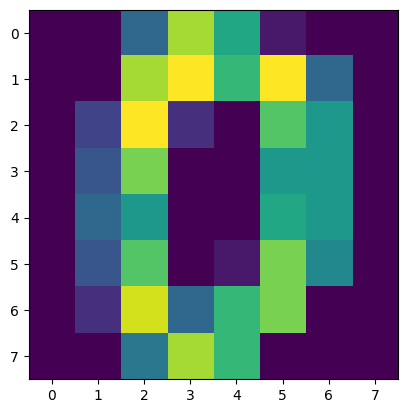

In [5]:
# Tracer la première image du jeu de données
plt.imshow(digits.images[0])

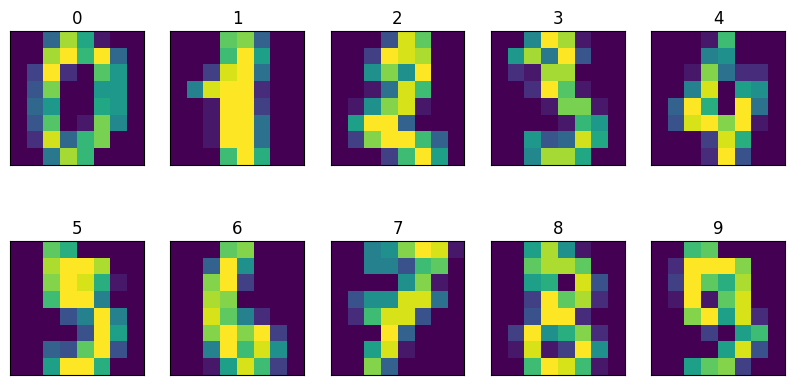

In [6]:
# Tracer les 10 premières images avec la valeur cible comme titre
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img, target in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(img)
    ax.set_title(target)

# Analyse exploratoire des données

In [7]:
# Forme du jeu de données (nb de lignes et de colonnes)
print(df_digits.shape)

# Nom des colonnes
print(df_digits.columns)

(1797, 65)
Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')


In [8]:
# Afficher les informations du jeu de données
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [9]:
# Afficher la description du jeu de données (moyenne, écart-type, min, max, quartiles)
display(df_digits.describe())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


La fonction describe n'est pas très intéressante pour ce jeu de données, mais nous pouvons voir que le nombre de valeurs correspond à la fonction shape. La plage de pixels est comprise entre 0 et 16 comme indiqué dans la description du jeu de données.

### Distribution de fréquence des valeurs dans les variables catégorielles

In [10]:
# Noms des valeurs cibles + saut de ligne
print(digits.target_names, "\n")

# Nombre pour chaque valeur cible
print(df_digits['target'].value_counts(), "\n")

# Comme ci-dessus mais en pourcentage
print(df_digits['target'].value_counts(normalize=True), "\n")

[0 1 2 3 4 5 6 7 8 9] 

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64 

target
3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: proportion, dtype: float64 



La distribution de fréquence montre que le jeu de données est bien équilibré. Ce qui est bon pour l'entraînement du réseau de neurones.

### Valeurs manquantes dans les variables

In [11]:
# Nombre de valeurs manquantes dans chaque colonne
print(df_digits.isnull().sum().sum())

0


Nous pouvons voir qu'il n'y a pas de valeurs manquantes dans le jeu de données.

In [12]:
# Matrice de corrélation entre toutes les caractéristiques
df_digits.corr()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


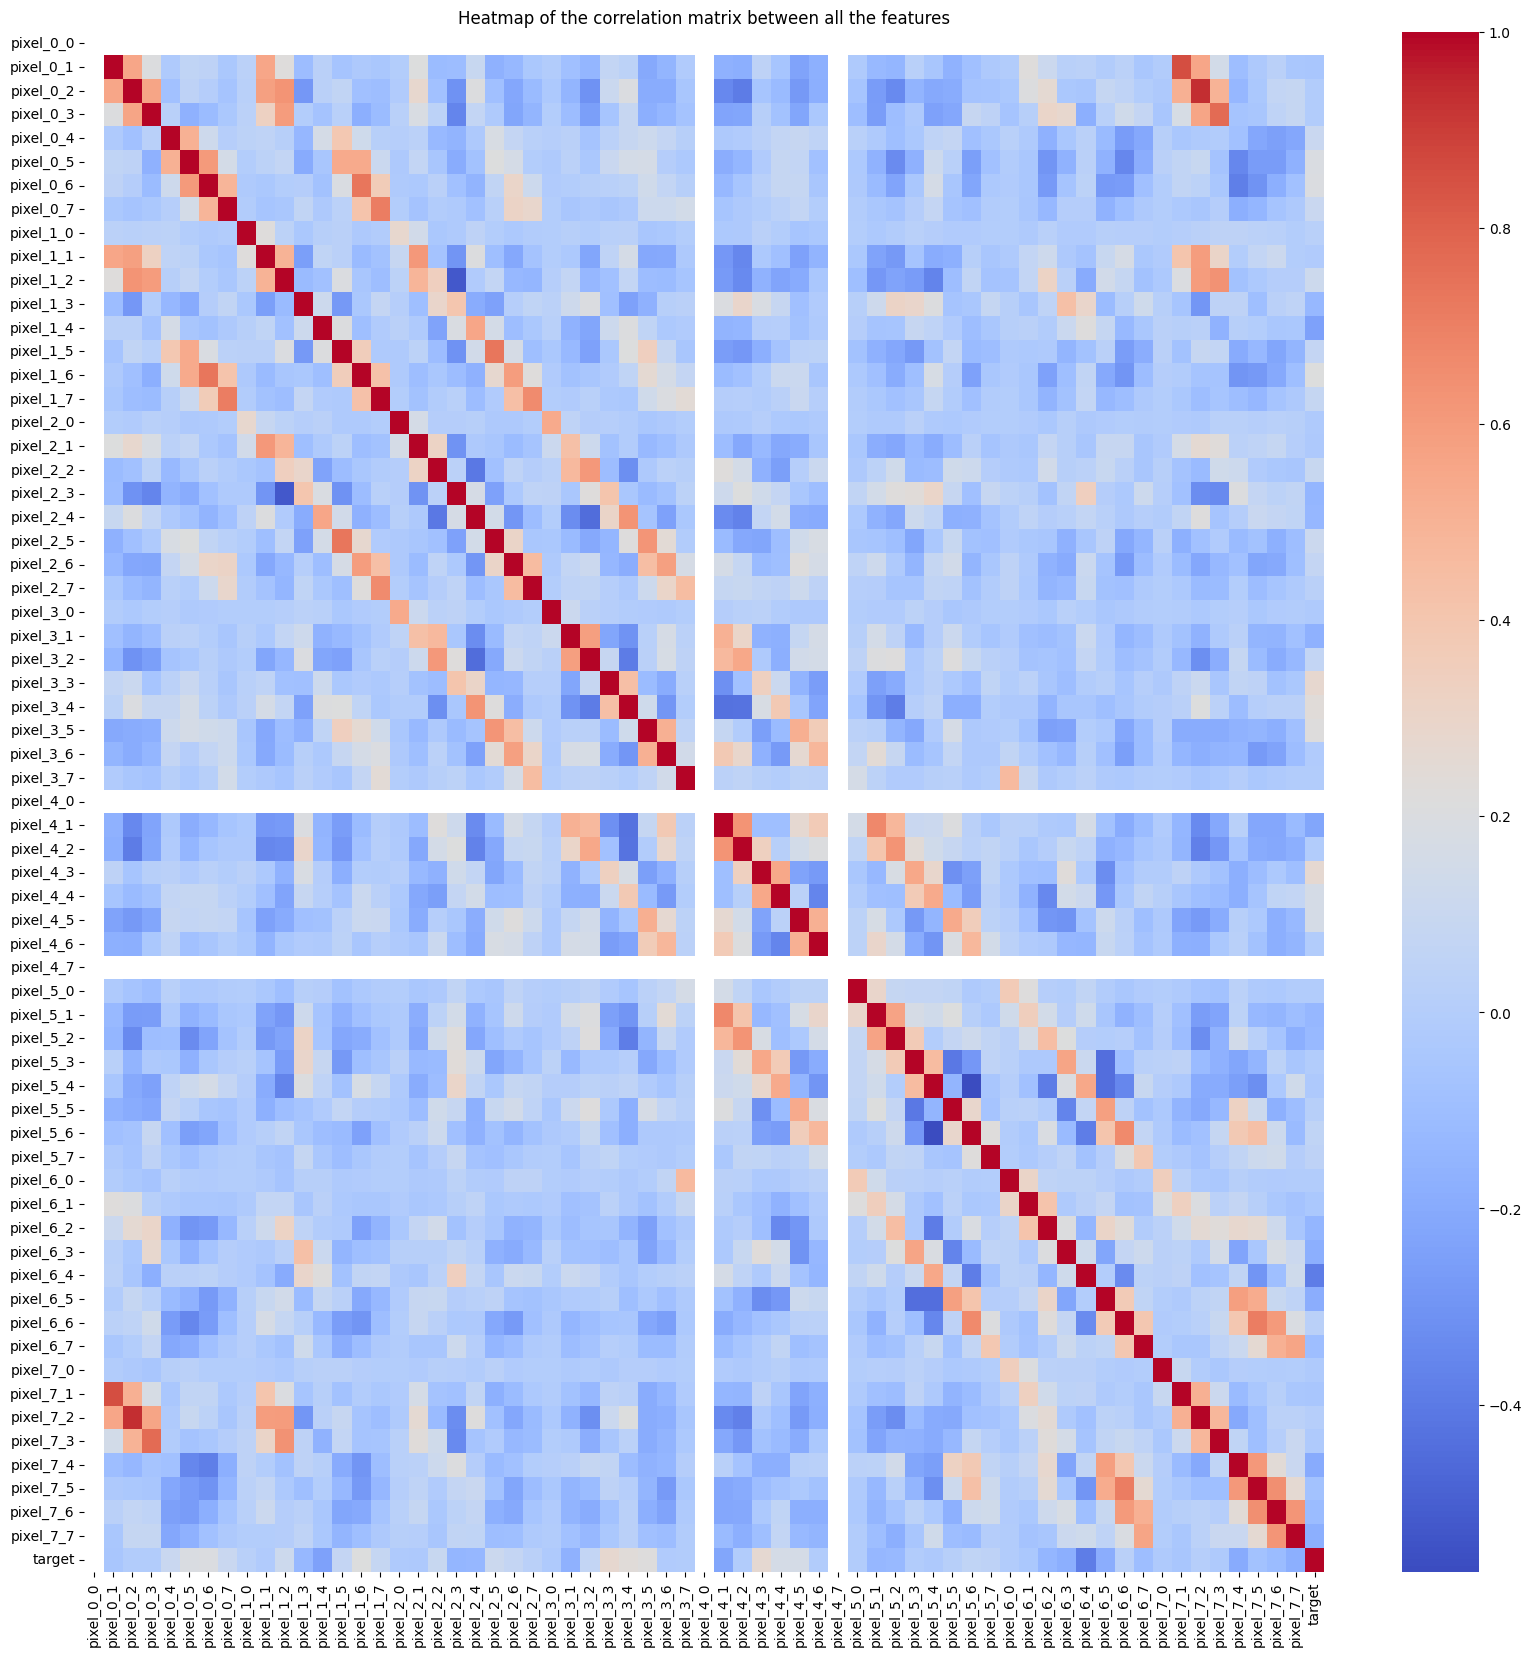

In [13]:
# Heatmap de la matrice de corrélation
plt.figure(figsize=(20, 20))
plt.title("Heatmap of the correlation matrix between all the features")
# Annot = True pour afficher les valeurs à l'intérieur du carré
sns.heatmap(df_digits.corr(), annot=False, cmap='coolwarm')
plt.show()


In [14]:
# afficher les variables les plus corrélées avec la variable cible (valeur absolue)
print(df_digits.corr()['target'].abs().sort_values(ascending=False))

target       1.000000
pixel_6_4    0.390625
pixel_3_3    0.275468
pixel_4_3    0.265880
pixel_1_4    0.244489
               ...   
pixel_5_3    0.006342
pixel_4_6    0.006153
pixel_0_0         NaN
pixel_4_0         NaN
pixel_4_7         NaN
Name: target, Length: 65, dtype: float64


D'après la matrice de corrélation, nous pouvons voir que la plupart des variables sont corrélées de manière égale avec la variable cible. Nous devrons donc utiliser toutes les variables pour entraîner le réseau de neurones.

# Diviser les données en ensembles d'entraînement et de test séparés

In [15]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_digits.drop('target', axis=1), df_digits['target'], test_size=0.2, random_state=42)

In [16]:
# Vérifier les dimensions
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1437, 64) (360, 64)
(1437,) (360,)


In [17]:
# Nombre de valeurs pour chaque cible dans les ensembles d'entraînement et de test
print(y_train.value_counts())
print(y_test.value_counts())

target
1    154
3    149
6    146
0    145
7    145
2    144
8    144
9    140
5    135
4    135
Name: count, dtype: int64
target
5    47
4    46
9    40
6    35
3    34
7    34
2    33
0    33
8    30
1    28
Name: count, dtype: int64


# Multi-Layer Perceptron(MLP)

![Multi-Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

Diagramme de Perceptron Multi-Couches (MLP) avec quatre couches cachées et une collection de polymorphismes nucléotidiques simples (SNP) en entrée, illustrant un "neurone" basique avec n entrées. Un neurone est le résultat de l'application de transformations non linéaires de combinaisons linéaires (xi, wi, et biais b).

In [18]:
# Utilisation d'un classifieur MLP pour prédire la variable cible

# Créer le modèle avec 3 couches de 32 neurones chacune
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32), verbose=True, random_state=1) 

# Entraîner le modèle
mlp.fit(X_train, y_train)

# Précision du modèle sur l'ensemble d'entraînement
print("Training set score: %f" % mlp.score(X_train, y_train))

Iteration 1, loss = 4.33002534
Iteration 2, loss = 2.92312621
Iteration 3, loss = 2.41198119
Iteration 4, loss = 2.09218216
Iteration 5, loss = 1.84386257
Iteration 6, loss = 1.61811445
Iteration 7, loss = 1.43740517
Iteration 8, loss = 1.27989353
Iteration 9, loss = 1.14336383
Iteration 10, loss = 1.02224374
Iteration 11, loss = 0.90713565
Iteration 12, loss = 0.80426349
Iteration 13, loss = 0.70885046
Iteration 14, loss = 0.62844397
Iteration 15, loss = 0.55226711
Iteration 16, loss = 0.49583693
Iteration 17, loss = 0.44566326
Iteration 18, loss = 0.40388610
Iteration 19, loss = 0.37040689
Iteration 20, loss = 0.34057991
Iteration 21, loss = 0.31301283
Iteration 22, loss = 0.29683420
Iteration 23, loss = 0.27372234
Iteration 24, loss = 0.25707312
Iteration 25, loss = 0.24031010
Iteration 26, loss = 0.22344158
Iteration 27, loss = 0.21069468
Iteration 28, loss = 0.19957420
Iteration 29, loss = 0.19166140
Iteration 30, loss = 0.17856457
Iteration 31, loss = 0.16792276
Iteration 32, los

In [19]:
# Prédire la variable cible
predictions = mlp.predict(X_test)

print(predictions[:25])
print(y_test[:25].values)

# Précision du modèle sur l'ensemble de test
print("Testing set score: %f" % accuracy_score(predictions, y_test))

[6 9 3 7 2 1 5 2 5 2 3 9 4 0 4 2 3 7 8 8 4 3 5 7 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5]
Testing set score: 0.963889


# Matrice de confusion

Une matrice de confusion aide à résumer les performances d'un algorithme de classification. Elle donne une image claire de la performance d'un modèle de classification ainsi que des types d'erreurs produites par celui-ci. <br>
Elle donne un résumé des prédictions correctes et incorrectes réparties par catégorie. 


Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification :


**Vrais Positifs (VP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* et l'observation appartient effectivement à cette classe *x*.


**Vrais Négatifs (VN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* et l'observation n'appartient effectivement pas à cette classe *x*.


**Faux Positifs (FP)** – Nous prédisons qu'une observation appartient à une certaine classe *x* mais l'observation **n'appartient pas** à cette classe *x*. Ce type d'erreur est appelé erreur de Type I.



**Faux Négatifs (FN)** – Nous prédisons qu'une observation n'appartient pas à une certaine classe *x* mais l'observation **appartient effectivement** à cette classe *x*. C'est une erreur très grave appelée erreur de Type II.



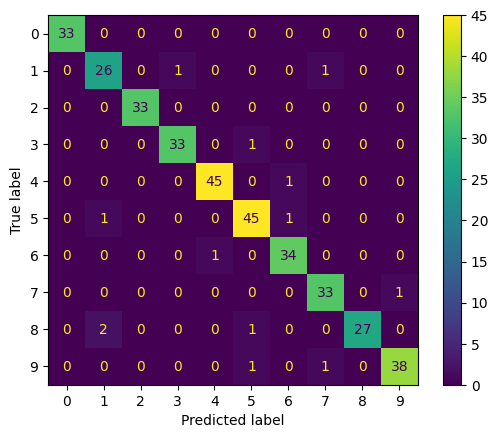

In [20]:
# Matrice de confusion
cm = confusion_matrix(y_test, predictions)

# Tracer la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()
plt.show()

# Validation croisée 

In [21]:
# Validation croisée avec 5 découpes différentes
scores = cross_val_score(mlp, df_digits.drop('target', axis=1), df_digits['target'], cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Iteration 1, loss = 4.27571116
Iteration 2, loss = 2.87765179
Iteration 3, loss = 2.35823274
Iteration 4, loss = 2.04408836
Iteration 5, loss = 1.79266584
Iteration 6, loss = 1.57176467
Iteration 7, loss = 1.38179839
Iteration 8, loss = 1.22272876
Iteration 9, loss = 1.07962741
Iteration 10, loss = 0.94903038
Iteration 11, loss = 0.83091337
Iteration 12, loss = 0.72715305
Iteration 13, loss = 0.64089307
Iteration 14, loss = 0.56044281
Iteration 15, loss = 0.49663932
Iteration 16, loss = 0.44832547
Iteration 17, loss = 0.40768435
Iteration 18, loss = 0.37293052
Iteration 19, loss = 0.34163904
Iteration 20, loss = 0.31753736
Iteration 21, loss = 0.29176974
Iteration 22, loss = 0.27806881
Iteration 23, loss = 0.25730571
Iteration 24, loss = 0.24041812
Iteration 25, loss = 0.22366311
Iteration 26, loss = 0.21246182
Iteration 27, loss = 0.19869392
Iteration 28, loss = 0.18541628
Iteration 29, loss = 0.17350982
Iteration 30, loss = 0.16542394
Iteration 31, loss = 0.15656417
Iteration 32, los

# Rapport de classification

**Le rapport de classification** est un autre moyen d'évaluer les performances du modèle de classification. Il affiche les scores de **précision**, **rappel**, **f1** et **support** pour le modèle. J'ai décrit ces termes plus loin.

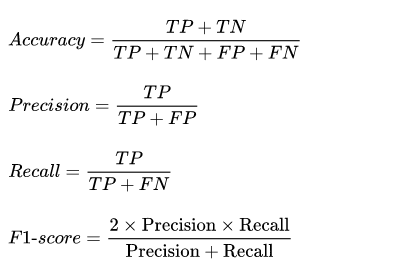


In [22]:
# Rapport de classification
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      0.93      0.91        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.96      0.95        47
           6       0.94      0.97      0.96        35
           7       0.94      0.97      0.96        34
           8       1.00      0.90      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# Références : 
1. https://scikit-learn.org/
2. https://www.researchgate.net/publication/334609713_A_Guide_for_Using_Deep_Learning_for_Complex_Trait_Genomic_Prediction/figures?lo=1